In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.max_open_warning'] = 0
import numpy as np
#import pandas as pd
df3 = pd.read_table(r"D:\Yuliya_test_data_table\Yuliya_test_data_table_deconv-only_3prime.txt", delimiter = '\t')#, nrows=2)
df5 = pd.read_table(r"D:\Yuliya_test_data_table\Yuliya_test_data_table_deconv-only.txt", delimiter = '\t')#, nrows=2)
#how many unique dna seq
unique_sequences = set()

# 3'

In [121]:
dfclean3 = df3.copy()
#keep this order because I went through the output file individually to determine these lines
dfclean3 = dfclean3[~dfclean3.index.isin(range(32629, 32917))] #122
dfclean3 = dfclean3[~dfclean3.index.isin(range(33826, 34687))] #126, 127, 128
dfclean3 = dfclean3[~dfclean3.index.isin(range(34943, 35494))] #130, 131
dfclean3 = dfclean3[~dfclean3.index.isin(range(35757, 36008))] #133
dfclean3 = dfclean3[~dfclean3.index.isin(range(37729, 37949))] #140
dfclean3 = dfclean3[~dfclean3.index.isin(range(38234, 38463))] #142
dfclean3 = dfclean3[~dfclean3.index.isin(range(38972, 39559))] #145, 146
dfclean3 = dfclean3[~dfclean3.index.isin(range(45581, 48310))] #170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182
dfclean3 = dfclean3[~(dfclean3.index >= 111952)] #the rest

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Disable column width wrapping

# Print the entire dataframe
#print(dfclean3)
#dfclean2.to_excel('C:/Users/Administrator/Desktop/dfclean3.xlsx', index=False)

In [1]:
#print(dfclean3.head())

grouped_dfclean3 = dfclean3.groupby(['plate', 'well'], as_index=False).mean().round()

print(grouped_dfclean3)


NameError: name 'dfclean3' is not defined

In [123]:
print(type(grouped_dfclean3))

<class 'pandas.core.frame.DataFrame'>


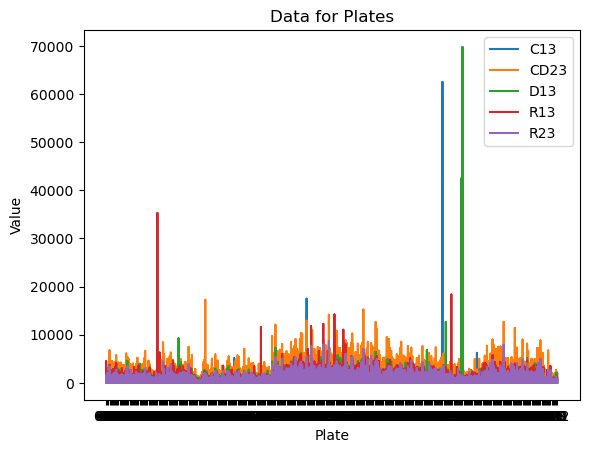

In [124]:
#one big plot
import matplotlib.pyplot as plt

grouped_dfclean3['plates'] = grouped_dfclean3['plate'].str.extract('(\d+)')

plates = grouped_dfclean3['plates']
c13 = grouped_dfclean3['C13']
cd23 = grouped_dfclean3['CD23']
d13 = grouped_dfclean3['D13']
r13 = grouped_dfclean3['R13']
r23 = grouped_dfclean3['R23']

# Create the plot
fig, ax = plt.subplots()
ax.plot(plates, c13, label='C13')
ax.plot(plates, cd23, label='CD23')
ax.plot(plates, d13, label='D13')
ax.plot(plates, r13, label='R13')
ax.plot(plates, r23, label='R23')

# Set the title and axis labels
ax.set_title('Data for Plates')
ax.set_xlabel('Plate')
ax.set_ylabel('Value')

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()

In [125]:
numerical_columns = ['C13', 'CD23', 'D13', 'R13', 'R23']

# Create a boolean mask for rows where any of the numerical columns have a value > 15000
mask = (dfclean3[numerical_columns] > 15000).any(axis=1)

# Use the mask to isolate the rows where the condition is True
result_df = dfclean3[mask]

print(result_df)

                           IB     plate well    C13   CD23    D13    R13   R23
12817  CAAACGGCCGATGCCTTGACGT  plate047  C03    890   1195    858  38114   675
12818  TTACTGTGGCTGTATGTACGAA  plate047  C03    892   1623    914  32478   652
24165  AATACACTAAATAGGCTTAGAA  plate090  L23    584  16578    603    453   418
24166  TGGGTCGGTGCCCAATAAGTAT  plate090  L23    607  17958    651    420   362
48401  ATTGCGTAAGCATAGCTCTCAG  plate183  G20   4417  17548   7394   4886  5743
50444  GAGGTTATTGGCCCGACCAGTG  plate192  P04   5644  21495   6007   5799  8919
51437  CGCGGAAGCCGAGAGATCAGGA  plate197  A11   5290  16637   4495   4729  7145
51455  AGTTCTTTTAAGAGCAGACCTA  plate197  B06  15153   3128   1175   1656  1660
51456  CAAAGAGCGATTAAAAAAGGTG  plate197  B06  19822   4700   1504   2249  2353
65886  GTTCACGTTCAGCGAGGGGTCG  plate248  P05   6894  15237   5703   6330  7025
69194  CCCGATCTCTGAAACCTAAGAC  plate261  N03  12697  15910   8147   7950  6274
84584  CGGATTCTCTTTACGTGGAGTC  plate319  I24  62524 

In [2]:
# Select numeric columns (excluding non-numeric columns like 'x', 'plate', and 'well')
numeric_columns = dfclean3.select_dtypes(include=[pd.np.number]).columns

dfclean3_zscores = dfclean3
# Calculate z-scores and add them as new columns
for col in numeric_columns:
    col_zscore = f'{col}_zscore'
    mean = dfclean3_zscores[col].mean()
    std = dfclean3_zscores[col].std()
    dfclean3_zscores[col_zscore] = (dfclean3_zscores[col] - mean) / std

print(dfclean3_zscores)

NameError: name 'dfclean3' is not defined

In [127]:
dfclean3_adjustedto_m = dfclean3
numeric_columns = dfclean3_adjustedto_m.select_dtypes(include=[np.number]).columns

# Calculate z-scores and adjust outliers to the mean
numeric_columns = dfclean3_adjustedto_m.select_dtypes(include=[np.number]).columns

# Adjust outliers to the mean
for col in numeric_columns:
    mean = dfclean3_adjustedto_m[col].mean()
    std = dfclean3_adjustedto_m[col].std()
    z_scores = (dfclean3_adjustedto_m[col] - mean) / std
    
    # Replace outliers (threshold: 3 standard deviations from the mean) with the mean
    outlier_threshold = 20.0
    dfclean3_adjustedto_m[col] = np.where(np.abs(z_scores) > outlier_threshold, mean, dfclean3_adjustedto_m[col])
    dfclean3_adjustedto_m[col] =  dfclean3_adjustedto_m[col].astype(int)
#print(dfclean3_adjustedto_m)

In [3]:
#one big plot
import matplotlib.pyplot as plt

dfclean3_adjustedto_m['plates'] = dfclean3_adjustedto_m['plate'].str.extract('(\d+)')

plates = dfclean3_adjustedto_m['plates']
c13 = dfclean3_adjustedto_m['C13']
cd23 = dfclean3_adjustedto_m['CD23']
d13 = dfclean3_adjustedto_m['D13']
r13 = dfclean3_adjustedto_m['R13']
r23 = dfclean3_adjustedto_m['R23']

# Create the plot
fig, ax = plt.subplots()
ax.plot(plates, c13, label='C13')
ax.plot(plates, cd23, label='CD23')
ax.plot(plates, d13, label='D13')
ax.plot(plates, r13, label='R13')
ax.plot(plates, r23, label='R23')

# Set the title and axis labels
ax.set_title('Data for Plates')
ax.set_xlabel('Plate')
ax.set_ylabel('Value')

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()

NameError: name 'dfclean3_adjustedto_m' is not defined

In [129]:
one_wk3 = dfclean3.iloc[:150]  
two_wk3= dfclean3.iloc[150:]   
one_wkadj3 = dfclean3_adjustedto_m.iloc[:150]  
two_wkadj3 = dfclean3_adjustedto_m.iloc[150:]   

In [4]:
full_data_one3 = one_wk3['C13']+one_wk3['CD23']+one_wk3['D13']+one_wk3['R13']+one_wk3['R23']
full_data_two3 = two_wk3['C13']+two_wk3['CD23']+two_wk3['D13']+two_wk3['R13']+two_wk3['R23']
full_data_oneadj3 = one_wkadj3['C13']+one_wkadj3['CD23']+one_wkadj3['D13']+one_wkadj3['R13']+one_wkadj3['R23']
full_data_twoadj3 = two_wkadj3['C13']+two_wkadj3['CD23']+two_wkadj3['D13']+two_wkadj3['R13']+two_wkadj3['R23']

plt.figure(figsize=(10, 6))
plt.boxplot([full_data_one3, full_data_two3, full_data_oneadj3, full_data_twoadj3], labels=['one_wk', 'two_wk', 'one_wkadj', 'two_wkadj'])

plt.xlabel('DataFrames')
plt.ylabel('Value')
plt.title('Box Plots for Specified Columns in Different DataFrames')

plt.show()

NameError: name 'one_wk3' is not defined

# 5'

In [5]:
dfclean5 = df5.copy()
#keep this order because I went through the output file individually to determine these lines
dfclean5 = dfclean5[~dfclean5.index.isin(range(33482, 33797))] #122
dfclean5 = dfclean5[~dfclean5.index.isin(range(34747, 35652))] #126, 127, 128
dfclean5 = dfclean5[~dfclean5.index.isin(range(35930, 36501))] #130, 131
dfclean5 = dfclean5[~dfclean5.index.isin(range(36770, 37054))] #133
dfclean5 = dfclean5[~dfclean5.index.isin(range(38773, 39015))] #140
dfclean5 = dfclean5[~dfclean5.index.isin(range(39325, 39543))] #142
dfclean5 = dfclean5[~dfclean5.index.isin(range(40030, 40626))] #145, 146
dfclean5 = dfclean5[~dfclean5.index.isin(range(46853, 49718))] #170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182
dfclean5 = dfclean5[~(dfclean5.index >= 115849)] #the rest

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Disable column width wrapping

# Print the entire dataframe
print(dfclean5)
#dfclean2.to_excel('C:/Users/Administrator/Desktop/dfclean5.xlsx', index=False)

NameError: name 'df5' is not defined

In [6]:
#print(dfclean3.head())

grouped_dfclean5 = dfclean5.groupby(['plate', 'well'], as_index=False).mean().round()

print(grouped_dfclean5)

NameError: name 'dfclean5' is not defined

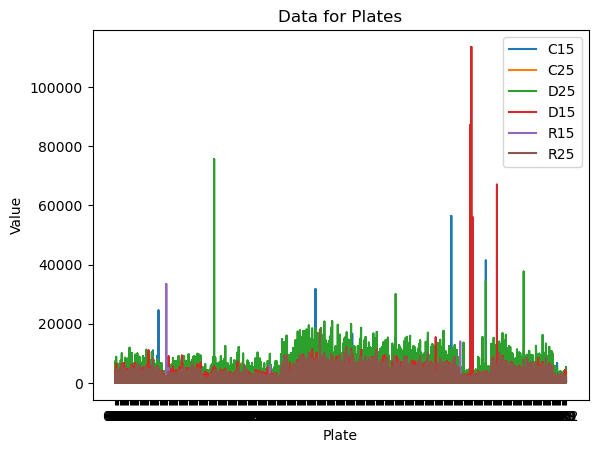

In [72]:
#one big plot
import matplotlib.pyplot as plt

grouped_dfclean5['plates'] = grouped_dfclean5['plate'].str.extract('(\d+)')

plates = grouped_dfclean5['plates']
c15 = grouped_dfclean5['C15']
c25 = grouped_dfclean5['C25']
d25 = grouped_dfclean5['D25']
d15 = grouped_dfclean5['D15']
r15 = grouped_dfclean5['R15']
r25 = grouped_dfclean5['R25']

# Create the plot
fig, ax = plt.subplots()
ax.plot(plates, c15, label='C15')
ax.plot(plates, c25, label='C25')
ax.plot(plates, d25, label='D25')
ax.plot(plates, d15, label='D15')
ax.plot(plates, r15, label='R15')
ax.plot(plates, r25, label='R25')

# Set the title and axis labels
ax.set_title('Data for Plates')
ax.set_xlabel('Plate')
ax.set_ylabel('Value')

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()

In [7]:
numerical_columns = ['C15', 'D25','C25', 'D15', 'R15', 'R25']

# Create a boolean mask for rows where any of the numerical columns have a value > 15000
mask = (dfclean5[numerical_columns] > 15000).any(axis=1)

# Use the mask to isolate the rows where the condition is True
result_df5 = dfclean5[mask]

print(result_df5)

NameError: name 'dfclean5' is not defined

In [86]:
dfclean5_adjustedto_m = dfclean5
numeric_columns = dfclean5_adjustedto_m.select_dtypes(include=[np.number]).columns

# Calculate z-scores and adjust outliers to the mean
numeric_columns = dfclean5_adjustedto_m.select_dtypes(include=[np.number]).columns

# Adjust outliers to the mean
for col in numeric_columns:
    mean = dfclean5_adjustedto_m[col].mean()
    std = dfclean5_adjustedto_m[col].std()
    z_scores = (dfclean5_adjustedto_m[col] - mean) / std
    
    # Replace outliers (threshold: 3 standard deviations from the mean) with the mean
    outlier_threshold = 20.0
    dfclean5_adjustedto_m[col] = np.where(np.abs(z_scores) > outlier_threshold, mean, dfclean5_adjustedto_m[col])
    dfclean5_adjustedto_m[col] =  dfclean5_adjustedto_m[col].astype(int)
#print(dfclean3_adjustedto_m)

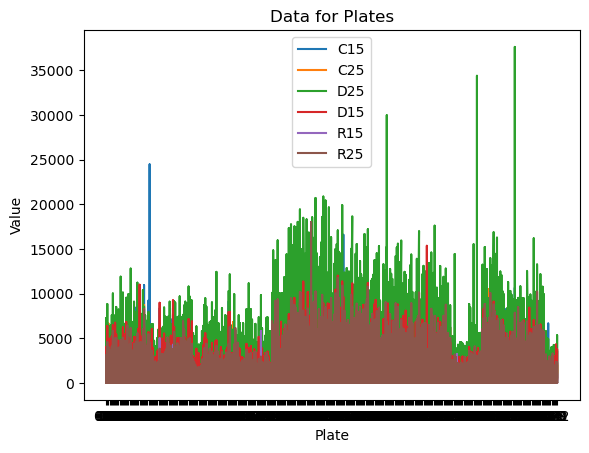

In [87]:
import matplotlib.pyplot as plt

dfclean5_adjustedto_m['plates'] = dfclean5_adjustedto_m['plate'].str.extract('(\d+)')

plates = dfclean5_adjustedto_m['plates']
c15 = dfclean5_adjustedto_m['C15']
c25 = dfclean5_adjustedto_m['C25']
d25 = dfclean5_adjustedto_m['D25']
d15 =dfclean5_adjustedto_m['D15']
r15 = dfclean5_adjustedto_m['R15']
r25 = dfclean5_adjustedto_m['R25']

# Create the plot
fig, ax = plt.subplots()
ax.plot(plates, c15, label='C15')
ax.plot(plates, c25, label='C25')
ax.plot(plates, d25, label='D25')
ax.plot(plates, d15, label='D15')
ax.plot(plates, r15, label='R15')
ax.plot(plates, r25, label='R25')

# Set the title and axis labels
ax.set_title('Data for Plates')
ax.set_xlabel('Plate')
ax.set_ylabel('Value')

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()

In [88]:
one_wk = dfclean5.iloc[:150]  
two_wk = dfclean5.iloc[150:]   
one_wkadj = dfclean5_adjustedto_m.iloc[:150]  
two_wkadj = dfclean5_adjustedto_m.iloc[150:]   

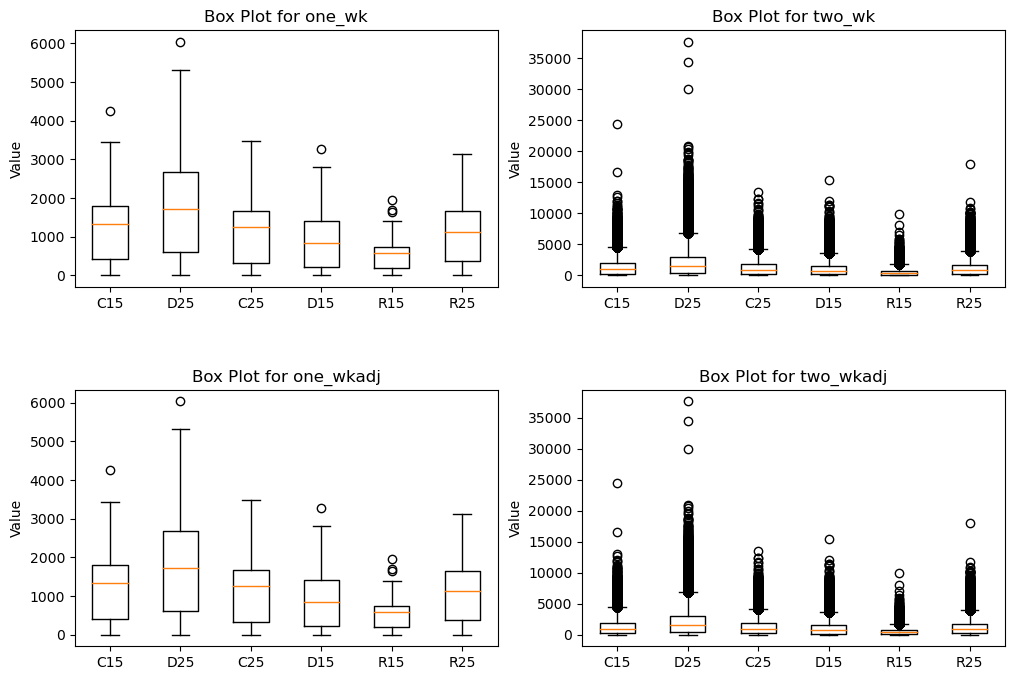

In [114]:
columns_to_compare = ['C15', 'D25', 'C25', 'D15', 'R15', 'R25']

# Combine the data from all DataFrames for box plotting
all_dataone = [one_wk[col] for col in columns_to_compare]
all_datatwo = [two_wk[col] for col in columns_to_compare]
all_dataoneadj = [one_wkadj[col] for col in columns_to_compare]
all_datatwoadj = [two_wkadj[col] for col in columns_to_compare]

labels = columns_to_compare

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
plt.subplots_adjust(hspace=0.4)

# Adjust vertical spacing between subplots

axs[0, 0].boxplot(all_dataone)
axs[0, 0].set_title('Box Plot for one_wk')
axs[0, 0].set_xticklabels(labels)
axs[0, 0].set_ylabel('Value')

axs[0, 1].boxplot(all_datatwo)
axs[0, 1].set_title('Box Plot for two_wk')
axs[0, 1].set_xticklabels(labels)
axs[0, 1].set_ylabel('Value')

axs[1, 0].boxplot(all_dataoneadj)
axs[1, 0].set_title('Box Plot for one_wkadj')
axs[1, 0].set_xticklabels(labels)
axs[1, 0].set_ylabel('Value')

axs[1, 1].boxplot(all_datatwoadj)
axs[1, 1].set_title('Box Plot for two_wkadj')
axs[1, 1].set_xticklabels(labels)
axs[1, 1].set_ylabel('Value')

plt.show()

In [8]:
full_data_one = one_wk['C15']+one_wk['D25']+one_wk['C25']+one_wk['D15']+one_wk['R15']+one_wk['R25']
full_data_two = two_wk['C15']+two_wk['D25']+two_wk['C25']+two_wk['D15']+two_wk['R15']+two_wk['R25']
full_data_oneadj = one_wkadj['C15']+one_wkadj['D25']+one_wkadj['C25']+one_wkadj['D15']+one_wkadj['R15']+one_wkadj['R25']
full_data_twoadj = two_wkadj['C15']+two_wkadj['D25']+two_wkadj['C25']+two_wkadj['D15']+two_wkadj['R15']+two_wkadj['R25']

plt.figure(figsize=(10, 6))
plt.boxplot([full_data_one, full_data_two, full_data_oneadj, full_data_twoadj], labels=['one_wk', 'two_wk', 'one_wkadj', 'two_wkadj'])

plt.xlabel('DataFrames')
plt.ylabel('Value')
plt.title('Box Plots for Specified Columns in Different DataFrames')

plt.show()


NameError: name 'one_wk' is not defined